In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
############## SVM ##############
#étape 1 : la  lecture et la compréhension des données 

df = pd.read_csv("/content/Drive/MyDrive/e-comerce dataset/data.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
#Compter les valeurs de classe pour voir la répartition entre 1 (produit arrivé) et 0(produit n'est pas arrivé )
sizes = df['Reached.on.Time_Y.N'].value_counts(sort = 1)
print(sizes)

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


([<matplotlib.patches.Wedge at 0x7ff4c134ce10>,
 [Text(-0.3290237775458344, 1.0496396304491695, ''),
  Text(0.3290237775458339, -1.0496396304491697, '')],
 [Text(-0.17946751502500058, 0.5725307075177288, '59.7%'),
  Text(0.17946751502500027, -0.5725307075177289, '40.3%')])

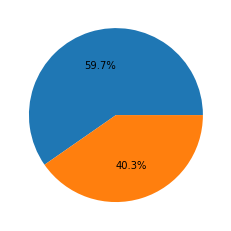

In [ ]:
#la proportion de chaque étiquette
plt.pie(sizes, autopct='%1.1f%%')

In [ ]:
#étape 1.5
#dans les prochains cas, nous allons explorer nos données
#cette ligne nous montre quelques informations sur notre jeu de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
#puisque l'ID est une information non pertinente, nous devons le supprimer de l'ensemble de données
df.drop(['ID'], axis=1, inplace=True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:

#les trois cas suivants sont pour sous-échantillonner l'ensemble de données et rendre les deux classes égales afin que le modèle s'entraîne sur les deux classes de manière égale
df_reached = df[df['Reached.on.Time_Y.N'] == 0]
df_not_reached = df[df['Reached.on.Time_Y.N'] == 1]

In [ ]:
df_reached_downsampled = resample(df_reached,replace=False,n_samples=4000,random_state=25) 
df_not_reached_downsampled = resample(df_not_reached,replace=False,n_samples=4000,random_state=25) 

In [ ]:
df_downsampled = pd.concat([df_not_reached_downsampled,df_reached_downsampled])
print(len(df_downsampled))

8000


1    4000
0    4000
Name: Reached.on.Time_Y.N, dtype: int64


([<matplotlib.patches.Wedge at 0x7ff4c03a8190>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

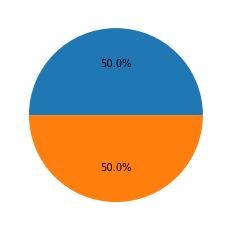

In [ ]:
sizes2 = df_downsampled['Reached.on.Time_Y.N'].value_counts(sort = 1)
print(sizes2)
plt.pie(sizes2, autopct='%1.1f%%')

In [ ]:
df_downsampled.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2554,C,Ship,5,5,264,3,medium,F,23,2837,1
2529,B,Ship,2,1,255,3,low,M,19,1551,1
1073,F,Road,3,1,148,2,medium,M,34,1053,1
9432,D,Road,6,3,271,4,low,F,2,1364,1
2539,F,Ship,2,5,252,2,low,F,21,2070,1


In [ ]:

X=df_downsampled.drop('Reached.on.Time_Y.N',axis=1).copy()
X.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
2554,C,Ship,5,5,264,3,medium,F,23,2837
2529,B,Ship,2,1,255,3,low,M,19,1551
1073,F,Road,3,1,148,2,medium,M,34,1053
9432,D,Road,6,3,271,4,low,F,2,1364
2539,F,Ship,2,5,252,2,low,F,21,2070


In [ ]:
y=df_downsampled['Reached.on.Time_Y.N'].copy()
y.head()

2554    1
2529    1
1073    1
9432    1
2539    1
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
df_downsampled.select_dtypes(['object'])

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
2554,C,Ship,medium,F
2529,B,Ship,low,M
1073,F,Road,medium,M
9432,D,Road,low,F
2539,F,Ship,low,F
...,...,...,...,...
8144,A,Ship,medium,F
6242,A,Ship,medium,F
9839,F,Road,low,F
10643,F,Ship,medium,M


In [ ]:
#rendre les rcolonnes non numériques numériques avec le codage à chaud et le codeur d'étiquette
X_encoded=pd.get_dummies(X,columns=['Warehouse_block','Mode_of_Shipment'])
X_encoded.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
2554,5,5,264,3,medium,F,23,2837,0,0,1,0,0,0,0,1
2529,2,1,255,3,low,M,19,1551,0,1,0,0,0,0,0,1
1073,3,1,148,2,medium,M,34,1053,0,0,0,0,1,0,1,0
9432,6,3,271,4,low,F,2,1364,0,0,0,1,0,0,1,0
2539,2,5,252,2,low,F,21,2070,0,0,0,0,1,0,0,1


In [ ]:
label_encoder_data =X_encoded
label_encoder = LabelEncoder()
for col in X_encoded.select_dtypes(['object']):
  
  label_encoder_data[col] = label_encoder.fit_transform(label_encoder_data[col])
X_encoded = label_encoder_data

In [ ]:
X_encoded.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
2554,5,5,264,3,2,0,23,2837,0,0,1,0,0,0,0,1
2529,2,1,255,3,1,1,19,1551,0,1,0,0,0,0,0,1
1073,3,1,148,2,2,1,34,1053,0,0,0,0,1,0,1,0
9432,6,3,271,4,1,0,2,1364,0,0,0,1,0,0,1,0
2539,2,5,252,2,1,0,21,2070,0,0,0,0,1,0,0,1


In [ ]:
#diviser les données 
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=35)

In [ ]:
#créer le modèle de classificateur SVM
model=SVC(random_state=28)

In [ ]:
#former le modèle
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=28, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
prediction_test = model.predict(X_test)

In [ ]:
#Imprimer la précision de la prédiction
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.69


In [ ]:
# comme la précision n'est que de 0,69 nous devons l'améliorer et pour cela nous allons utiliser la méthode de validation croisée

#ici, nous définissons les paramètres que nous allons essayer
       
param_grid = [
              {'C':[0.5,3,5,7,9,10,100],
              'gamma':['scale',1,0.1,0.01,0.001,0.0001],
               'kernel':['rbf']},
                       ]

In [ ]:
#appliquer les paramètres ci-dessus sur un modèle
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=2
)

In [ ]:
#entraîner le modèle sur les paramètres définis précédemment
optimal_params.fit(X_train,y_train)


Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] C=0.5, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   1.7s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   1.7s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   1.7s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   1.7s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   1.7s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   1.7s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   1.7s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   1.8s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed: 17.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.5, 3, 5, 7, 9, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [ ]:
#imprimer les meilleurs paramètres de la méthode de validation croisée
print(optimal_params.best_params_)

{'C': 3, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
model2=SVC(kernel='rbf',C=3,gamma=0.0001)

In [ ]:
model2.fit(X_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
prediction_test2 = model2.predict(X_test)

In [ ]:
#ici nous voyons que l'accuarcy augment en  appliquant les paramètres de la méthode de validation croisée
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test2))

Accuracy =  0.7375


################################################################################################################################################################

In [ ]:
# sauvegarder le modéle dans le disque 
filename = '/content/Drive/MyDrive/e-comerce model/model2_SVM_ecommerce_73-75.sav'
pickle.dump(model2, open(filename, 'wb'))

In [ ]:
#maintenant nous allons essayer votre modèle enregistré sur un autre ensemble


loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
prediction_loaded_model = loaded_model.predict(X_test)
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_loaded_model))

Accuracy =  0.7375


In [ ]:
cm = metrics.confusion_matrix(y_test,prediction_loaded_model)
print(cm)

[[772  12]
 [408 408]]


In [ ]:
!pip install AutoViz
!pip install xlrd

In [ ]:
#importation de la classe Autoviz
from autoviz.AutoViz_Class import AutoViz_Class

#Initioaliser la classe Autovis
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (10999, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21


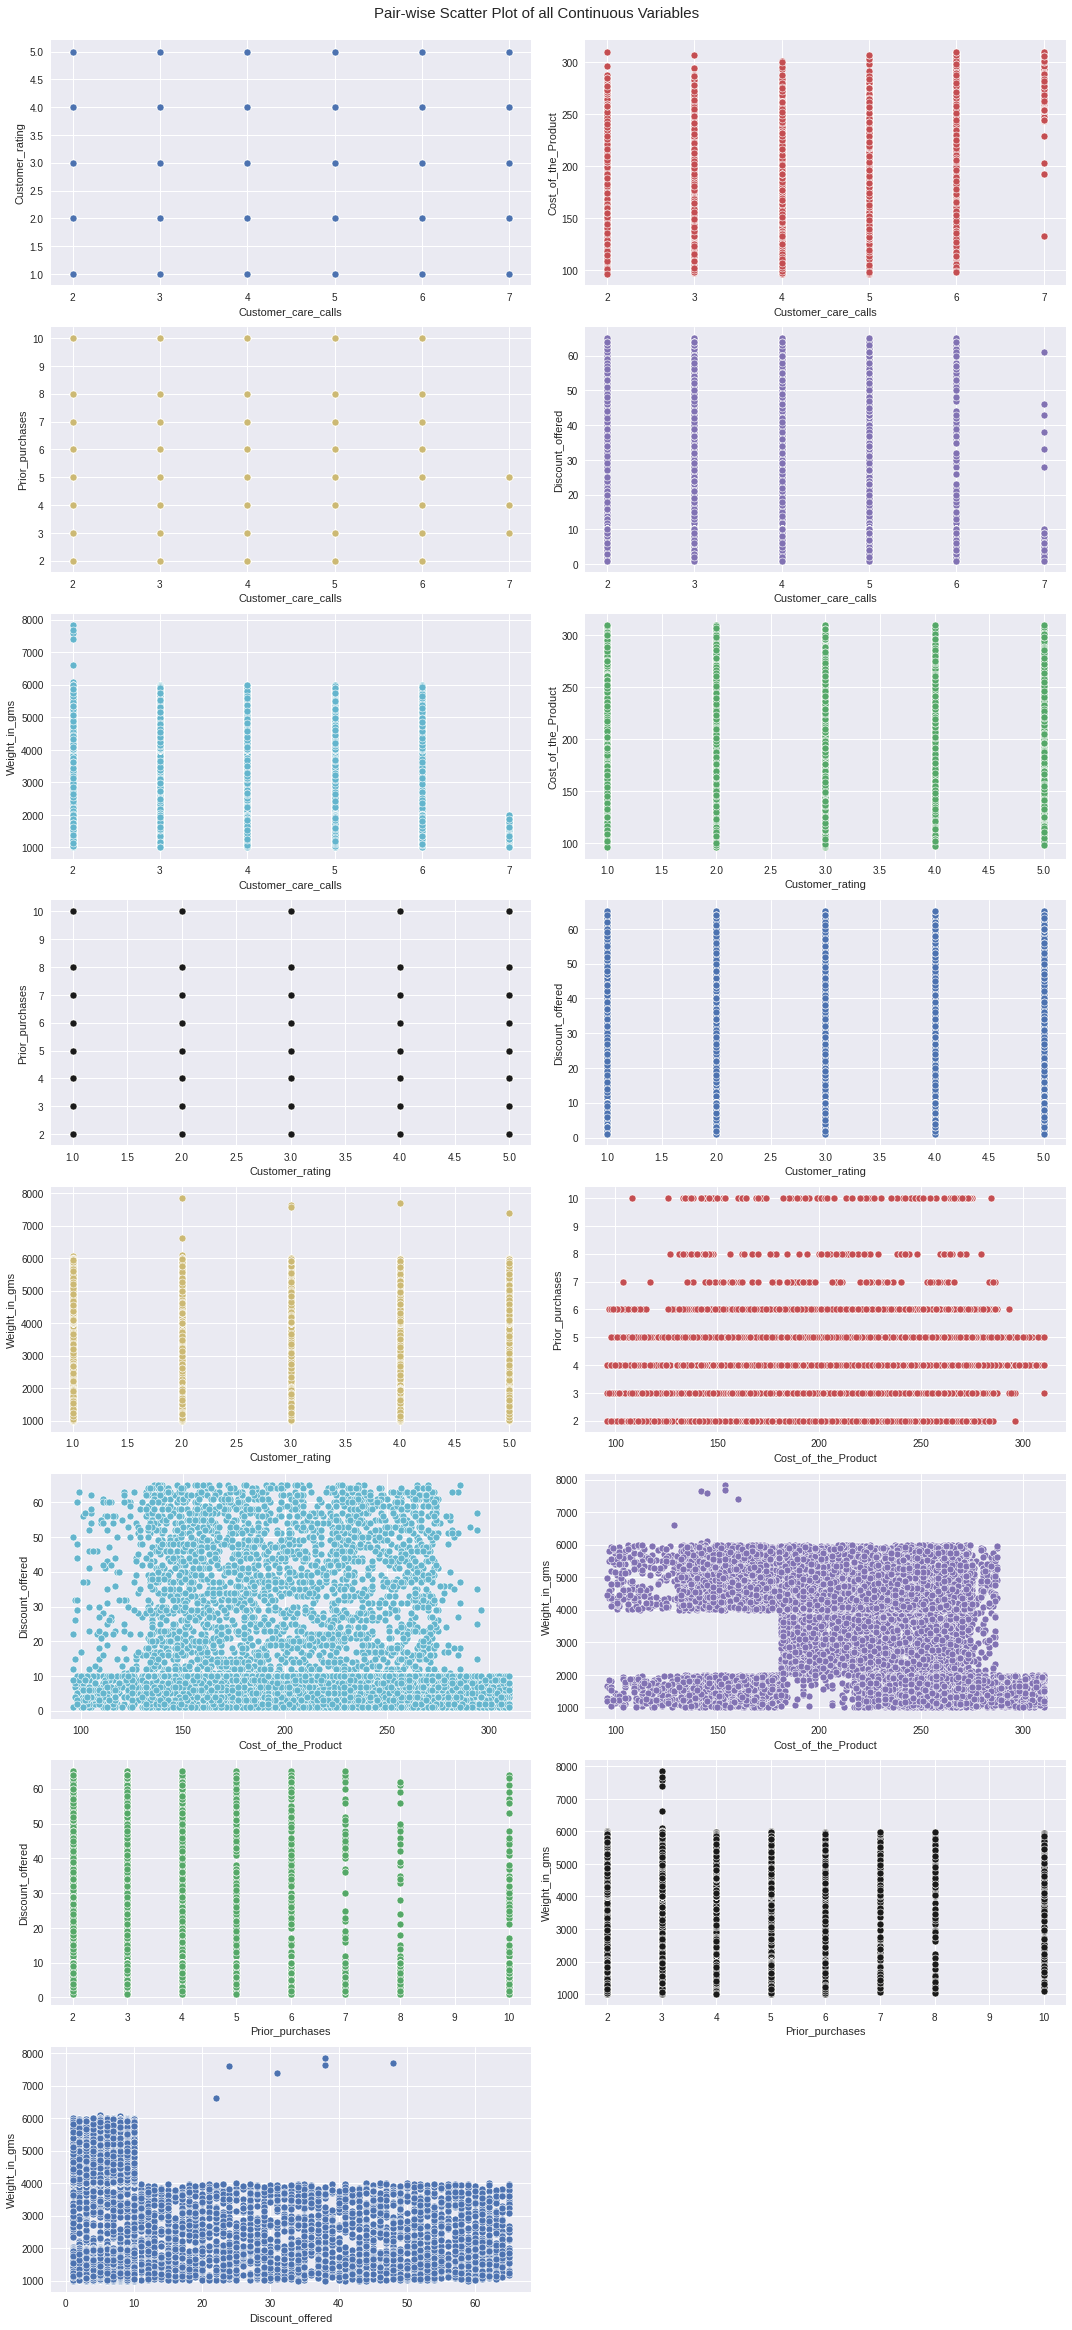

Could not draw Distribution Plot


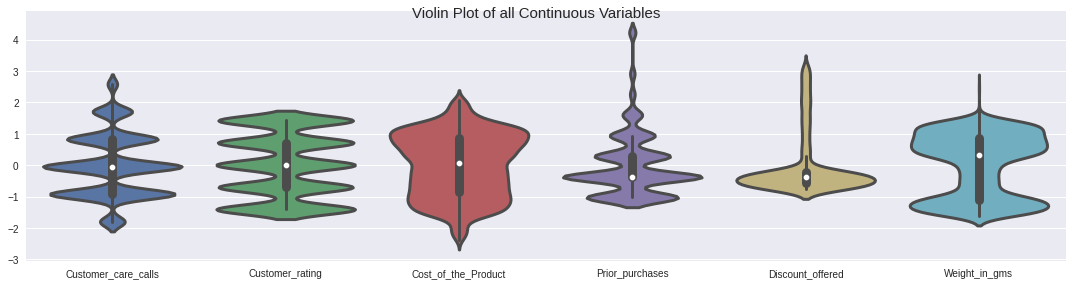

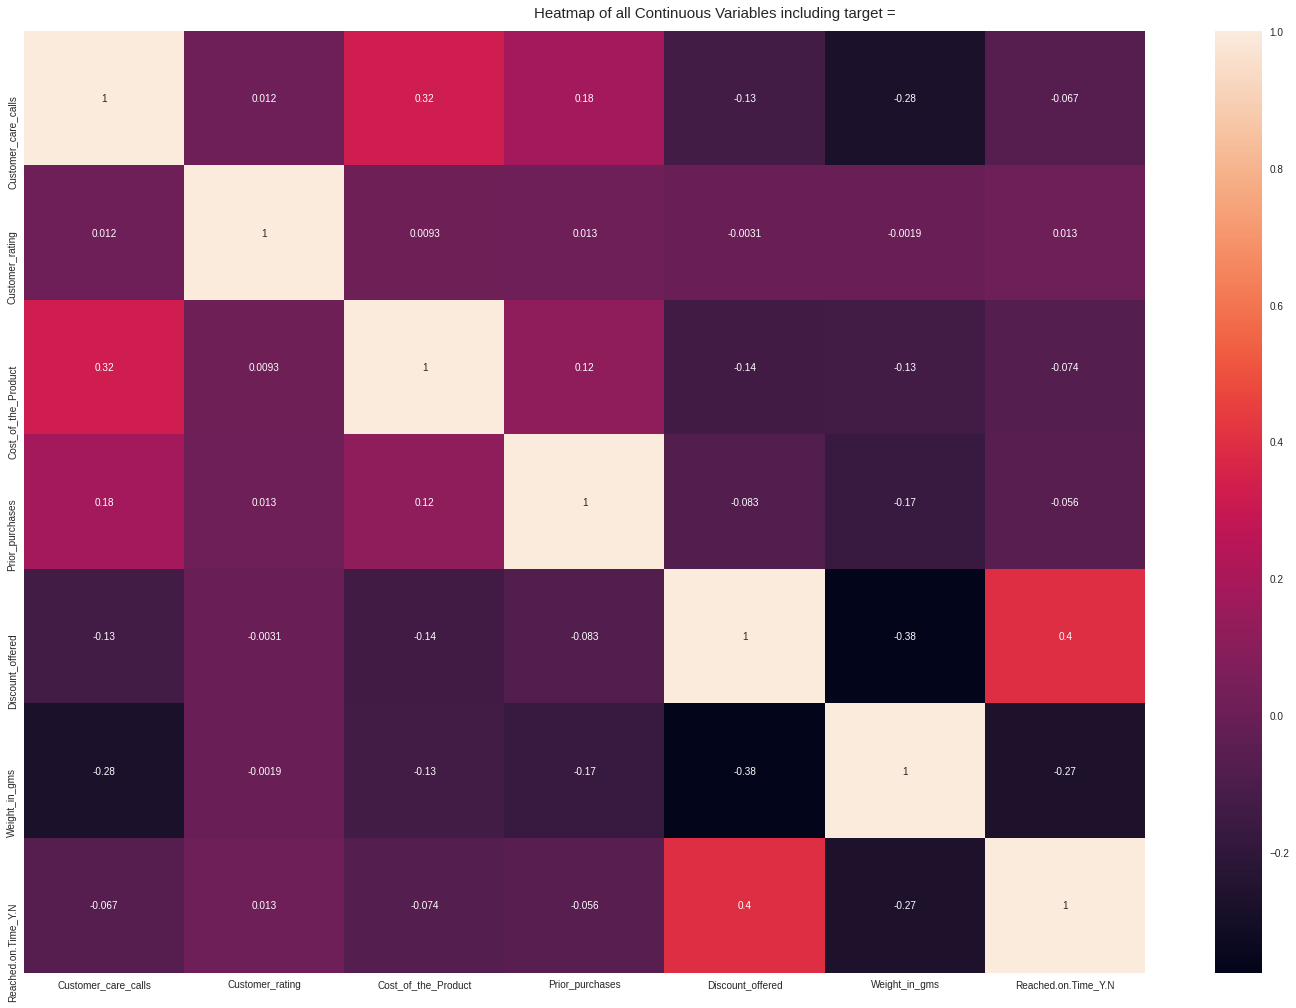

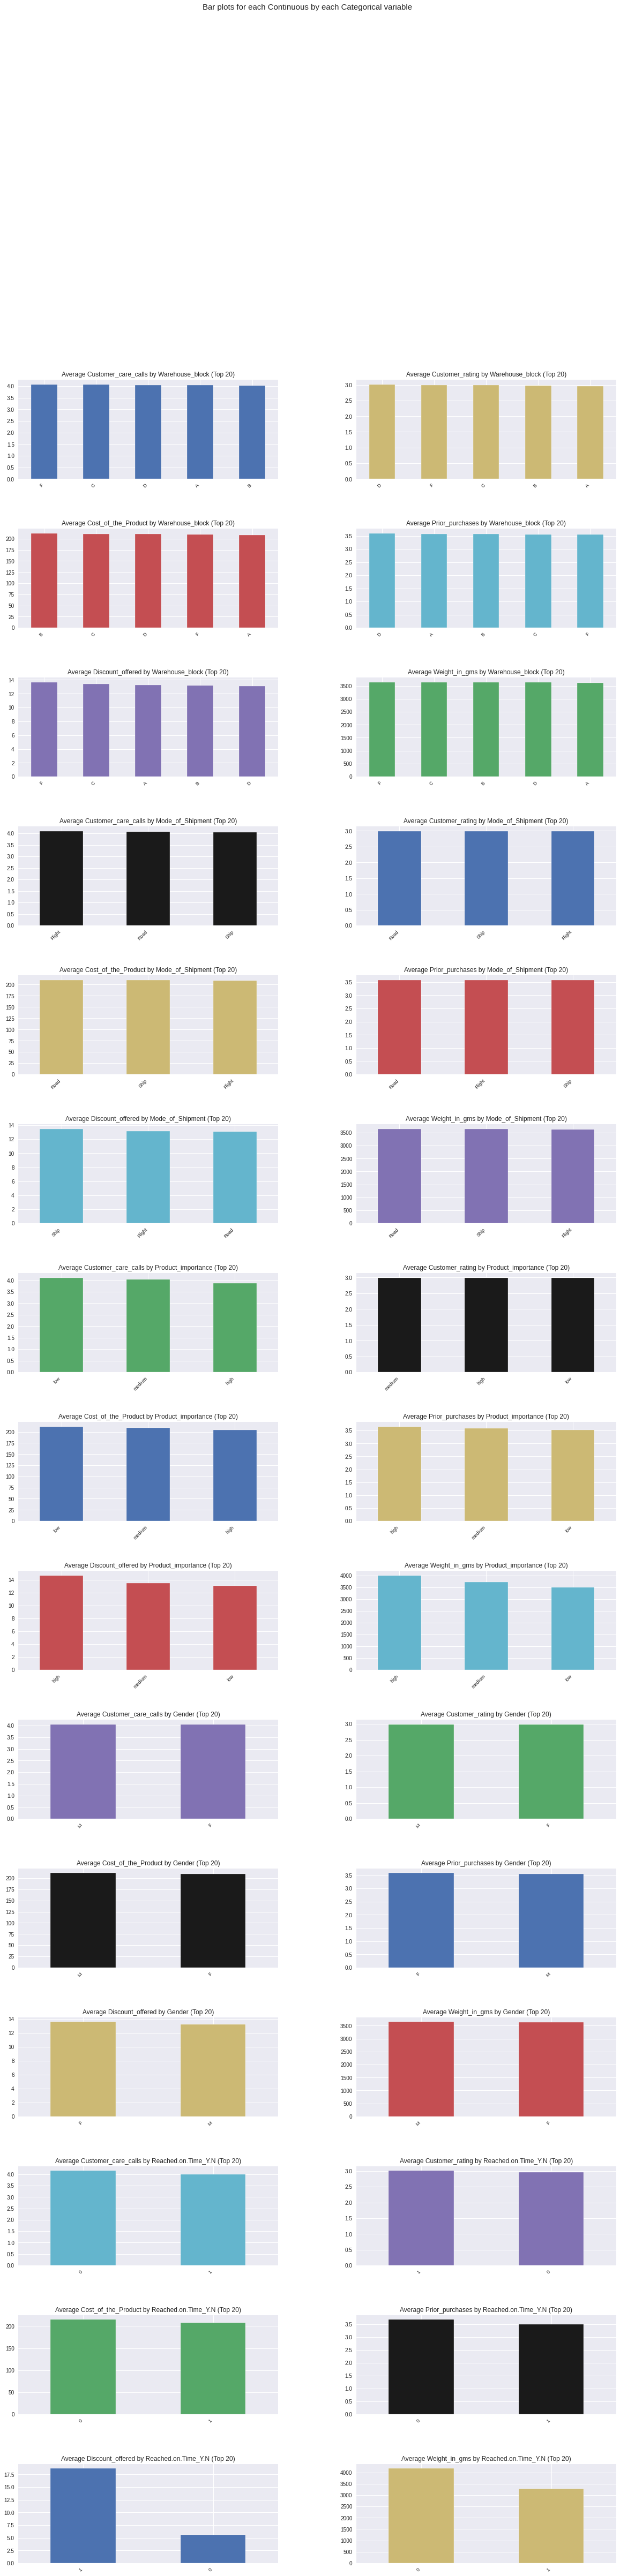

Time to run AutoViz (in seconds) = 11.409

 ###################### VISUALIZATION Completed ########################


In [ ]:
#dans le modèle svm, j'ai visualisé les informations sur l'ensemble de données et dans le modèle d'arbre de décision, j'ai visualisé les informations sur la variable cible `` atteinte à temps ''
#grâce à la bibliothèque autoviz pour faciliter la visualisation des données
dftc = AV.AutoViz('/content/Drive/MyDrive/e-comerce dataset/data.csv')